# Multiple Classifiers Ensemble System (MCS)

#### Iury Zanonni de Faria

### Imports

#### General imports

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import statistics as st
import matplotlib.pyplot as plt
import warnings

#### Feature Selection imports

In [2]:
from sklearn.feature_selection import mutual_info_classif
# Info gain - weka

#### Diversity imports

In [3]:
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

#### Classifiers imports

In [4]:
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


#### k-mean

In [5]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

#### Metrics

In [6]:
from sklearn.metrics import precision_score

In [7]:
from sklearn.model_selection import train_test_split

### Settings

In [8]:
DATA = ['Date', 'Current Ratio','Quick Ratio','Current Assets', 'Long-term debt to equity ratio', 'Share Holder Equity','Debt to Equity Ratio', 'Percentage of net profit to sale',
'Percentage of operating profit to sale','Percentage of Gross profit to sale','ROA','ROE','EPS','P/E','P/S','Stock book value','Stock Price','ROI','MarketReturn', 'Company']

DATA = ['Unnamed: 0', 'revenue','cost-goods-sold','gross-profit','research-development-expenses','selling-general-administrative-expenses','operating-expenses',
'operating-income','total-non-operating-income-expense','pre-tax-income','total-provision-income-taxes','income-after-taxes','income-from-continuous-operations',
'income-from-discontinued-operations','net-income','ebitda','ebit','basic-shares-outstanding','shares-outstanding','eps-basic-net-earnings-per-share',
'eps-earnings-per-share-diluted','cash-on-hand','receivables-total','inventory','other-current-assets','total-current-assets','net-property-plant-equipment',
'long-term-investments','goodwill-intangible-assets-total','other-long-term-assets','total-long-term-assets','total-assets','total-current-liabilities','long-term-debt',
'other-non-current-liabilities','total-long-term-liabilities','total-liabilities','common-stock-net','retained-earnings-accumulated-deficit','comprehensive-income',
'total-share-holder-equity','total-liabilities-share-holders-equity','net-income-loss','total-depreciation-amortization-cash-flow','other-non-cash-items','total-non-cash-items',
'change-in-accounts-receivable','change-in-inventories','change-in-accounts-payable','change-in-assets-liabilities','total-change-in-assets-liabilities',
'cash-flow-from-operating-activities','net-change-in-property-plant-equipment','net-change-in-intangible-assets','net-acquisitions-divestitures','investing-activities-other',
'cash-flow-from-investing-activities','net-long-term-debt','net-current-debt','debt-issuance-retirement-net-total','net-common-equity-issued-repurchased',
'net-total-equity-issued-repurchased','total-common-preferred-stock-dividends-paid','financial-activities-other','cash-flow-from-financial-activities',
'net-cash-flow','stock-based-compensation','common-stock-dividends-paid','current-ratio','long-term-debt-capital','debt-equity-ratio','gross-margin',
'operating-margin','ebit-margin','pre-tax-profit-margin','net-profit-margin','asset-turnover','inventory-turnover','receiveable-turnover','days-sales-in-receivables',
'roe','return-on-tangible-equity','roa','roi','book-value-per-share','operating-cash-flow-per-share','free-cash-flow-per-share','net-change-in-short-term-investments',
'net-change-in-long-term-investments','net-change-in-investments-total','other-operating-income-expenses','pre-paid-expenses','other-share-holders-equity','other-income',
'ebitda-margin']

REAL_RETURN_CLASS = "RealReturnClass"
REAL_RETURN = "RealReturn"
RISK_CLASS = 'RiskClass'
RISK = "Risk"

HIGH = 'high'
MEDIUM = 'medium'
LOW = 'low'

DATE = 'Unnamed: 0'

N_PERIODS = 2
N_FEATURES = 20

DATASET_PATH = 'new_dataset_2/process_final_{}.csv'.format(N_PERIODS)

#Remove os warnings do notebook
warnings.filterwarnings('ignore')

### Import dataset

In [9]:
dataset = pd.read_csv(DATASET_PATH)

### Data Frequency

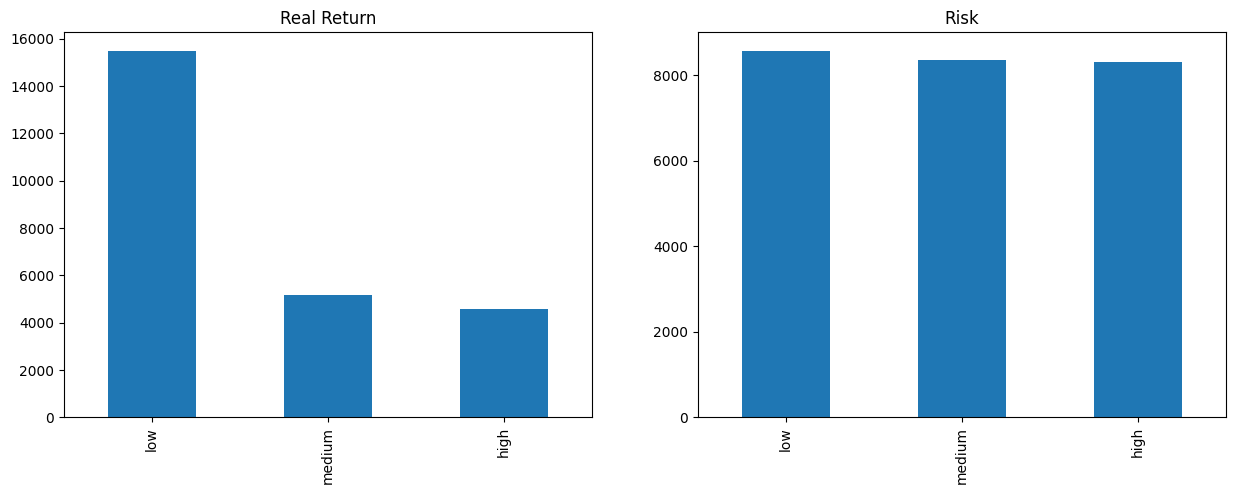

In [10]:
def plotResults(dataset:pd.DataFrame, title_1:str, title_2:str):
  fig, axes = plt.subplots(nrows=1, ncols=2)
  fig.set_figwidth(15)
  fig.set_figheight(5)

  x = dataset[REAL_RETURN_CLASS].value_counts()
  x.plot.bar(ax=axes[0])
  axes[0].set_title(title_1)

  x = dataset[RISK_CLASS].value_counts()
  x.plot.bar(ax=axes[1])
  axes[1].set_title(title_2)

plotResults(dataset, "Real Return", "Risk")

### Feature Selection

In [11]:
dataset = dataset.replace(to_replace=[HIGH], value=2.0)
dataset = dataset.replace(to_replace=[MEDIUM], value=1.0)
dataset = dataset.replace(to_replace=[LOW], value=0.0)

dataset = dataset.replace(to_replace=[np.NaN], value=0.0)

dataset_X = dataset.drop(columns=[REAL_RETURN_CLASS, REAL_RETURN, RISK_CLASS, RISK, DATE])
dataset_y = dataset.drop(columns=DATA)

#### Real Return

In [12]:
rank_real_return = mutual_info_classif(dataset_X, dataset_y[REAL_RETURN_CLASS], discrete_features=True)

result_real_return = {}

for i in range(0, len(dataset_X.columns)):
    result_real_return[dataset_X.columns[i]] = rank_real_return[i]

final_ranking_real_return = sorted(result_real_return.items(), key=lambda x: x[1])
final_ranking_real_return.reverse()
final_ranking_real_return

[('return-on-tangible-equity', 0.9172401633713403),
 ('book-value-per-share', 0.9162202180060066),
 ('total-liabilities-share-holders-equity', 0.9122010955158191),
 ('total-assets', 0.9122010955158191),
 ('pre-tax-profit-margin', 0.9118016192007165),
 ('net-profit-margin', 0.9066907350045312),
 ('total-long-term-assets', 0.9022534983371758),
 ('total-liabilities', 0.900589011944472),
 ('roi', 0.8999168989029271),
 ('operating-margin', 0.8974878610833771),
 ('ebit-margin', 0.8971041918067462),
 ('roe', 0.8921187083015404),
 ('total-long-term-liabilities', 0.8785419908769444),
 ('total-share-holder-equity', 0.8778183853052703),
 ('retained-earnings-accumulated-deficit', 0.8720317118526186),
 ('total-current-assets', 0.8613179987445707),
 ('roa', 0.856735269685155),
 ('total-current-liabilities', 0.8454484456857358),
 ('days-sales-in-receivables', 0.8443220907524149),
 ('gross-margin', 0.8357498518448058),
 ('revenue', 0.809419918595905),
 ('net-property-plant-equipment', 0.80748557121576

#### Risk

In [13]:
rank_risk = mutual_info_classif(dataset_X, dataset_y[RISK_CLASS], discrete_features=True)

result_risk = {}

for i in range(0, len(dataset_X.columns)):
    result_risk[dataset_X.columns[i]] = rank_risk[i]

final_ranking_risk = sorted(result_risk.items(), key=lambda x: x[1])
final_ranking_risk.reverse()
final_ranking_risk

[('book-value-per-share', 1.0784425867160599),
 ('total-liabilities-share-holders-equity', 1.0717568846548442),
 ('total-assets', 1.0717568846548442),
 ('pre-tax-profit-margin', 1.0711046706339795),
 ('net-profit-margin', 1.0647163913789341),
 ('return-on-tangible-equity', 1.063851336257565),
 ('total-long-term-assets', 1.0611918510041671),
 ('total-liabilities', 1.0601593329331624),
 ('total-long-term-liabilities', 1.0365583850131825),
 ('total-share-holder-equity', 1.034670268322287),
 ('ebit-margin', 1.0317955300269894),
 ('operating-margin', 1.0317062936150456),
 ('retained-earnings-accumulated-deficit', 1.0212384246342023),
 ('roe', 1.0154130234328296),
 ('total-current-assets', 1.00680397913884),
 ('total-current-liabilities', 0.9876152488115346),
 ('roi', 0.9727947082735746),
 ('net-property-plant-equipment', 0.9312708958972217),
 ('revenue', 0.9262181142582221),
 ('days-sales-in-receivables', 0.9213639592925729),
 ('long-term-debt', 0.9137841195830623),
 ('roa', 0.9125607479104

In [14]:
def getColumnsRank(rank: list):
  ranking = []
  for column in rank:
    ranking.append(column[0])
    
  return ranking

In [15]:
features_real_return = getColumnsRank(final_ranking_real_return)[:N_FEATURES]
features_risk = getColumnsRank(final_ranking_risk)[:N_FEATURES]

### SSCA

O cálculo será feito com o número total de features ou somente com as 15 mais bem ranqueadas?

In [16]:

SSCAS = []

features_return = getColumnsRank(final_ranking_real_return)[:N_FEATURES]

#dataset_X = dataset.drop(columns=[REAL_RETURN_CLASS, REAL_RETURN, RISK_CLASS, RISK, "Date", "Company"])
dataset_X = dataset[features_return]
dataset_y = dataset.drop(columns=DATA)

dataset_X

,return-on-tangible-equity,book-value-per-share,total-liabilities-share-holders-equity,total-assets,pre-tax-profit-margin,net-profit-margin,total-long-term-assets,total-liabilities,roi,operating-margin,ebit-margin,roe,total-long-term-liabilities,total-share-holder-equity,retained-earnings-accumulated-deficit,total-current-assets,roa,total-current-liabilities,days-sales-in-receivables,gross-margin
0,33.4590,3.6102,336309.0,336309.0,27.8041,23.4357,224017.0,278202.0,12.7232,27.8162,27.8162,33.4590,148329.0,58107.0,5289.0,112292.0,5.7810,129873.0,45.8272,43.2563
1,37.1074,4.1585,350662.0,350662.0,30.9823,25.7098,232482.0,283263.0,14.6496,30.8179,30.8179,37.1074,155755.0,67399.0,12712.0,118180.0,7.1322,127508.0,42.0033,43.7499
2,48.1427,4.4020,381191.0,381191.0,33.2736,27.9398,228037.0,309259.0,19.3939,33.4729,33.4729,48.1427,161685.0,71932.0,14435.0,153154.0,9.0847,147574.0,47.3821,43.7638
3,32.5741,3.8407,351002.0,351002.0,27.8887,24.6533,216166.0,287912.0,11.9347,28.5341,28.5341,32.5741,162431.0,63090.0,5562.0,134836.0,5.8550,125481.0,55.6087,42.1953
4,33.8270,3.8824,329840.0,329840.0,29.9249,26.7014,215417.0,265560.0,12.7882,29.6265,29.6265,33.8270,157806.0,64280.0,9233.0,114423.0,6.5923,107754.0,37.4748,43.2927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25243,-14.4380,21.9349,15643.0,15643.0,-64.6876,-49.8006,11000.0,2947.0,-8.8532,-0.8861,-0.8861,-8.8672,776.0,12696.0,0.0,4643.0,-7.1853,2171.0,63.0837,38.8569
25244,-7.1510,-14.6628,1049.8,1049.8,25.2834,21.4359,469.2,1897.4,7.9541,33.3562,33.3562,-7.3620,1668.9,-847.6,-556.0,580.6,5.9440,228.5,6.8636,69.7011
25245,-7.9425,-16.7393,833.5,833.5,34.2077,28.9982,407.0,1801.0,12.5711,36.0291,36.0291,-8.2274,1632.1,-967.5,0.0,426.5,9.5501,168.9,4.9836,69.6539
25246,19.1251,0.0000,739.9,739.9,40.3042,34.1514,481.6,189.4,17.9473,40.3042,40.3042,17.9473,30.3,550.5,0.0,258.3,13.3532,159.1,36.8026,70.4805


In [17]:
for cluster in range(2, 7):
  clusterer = KMeans(n_clusters=cluster, random_state=10)

  cluster_labels = clusterer.fit_predict(dataset_X)

  silhouette_values = silhouette_samples(dataset_X, cluster_labels)
  #silhouette_avg = silhouette_score(dataset_X, cluster_labels)

  sum_count = 0
  count_2 = 0

  #Primeiro somatorio
  for k in range(cluster):
    count = 0
    n_j = 0

    #Segundo somatorio
    for j in range(len(cluster_labels)):
      if cluster_labels[j] == k:
        n_j += 1
        count += silhouette_values[j]

    count_2 = (count/n_j)
    sum_count += count_2

  SSCA = (sum_count/cluster)
  SSCAS.append((cluster, round(SSCA, 2)))

SSCAS

[(2, 0.82), (3, 0.65), (4, 0.53), (5, 0.49), (6, 0.45)]

### Divisão do dataset

In [18]:
columns_dataset = DATA
columns_dataset.append(REAL_RETURN)
columns_dataset.append(RISK)
columns_dataset.append(REAL_RETURN_CLASS)
columns_dataset.append(RISK_CLASS)

df_train = None
df_test = None

df_train = pd.DataFrame(columns=columns_dataset)
df_test = pd.DataFrame(columns=columns_dataset)

16964
8284


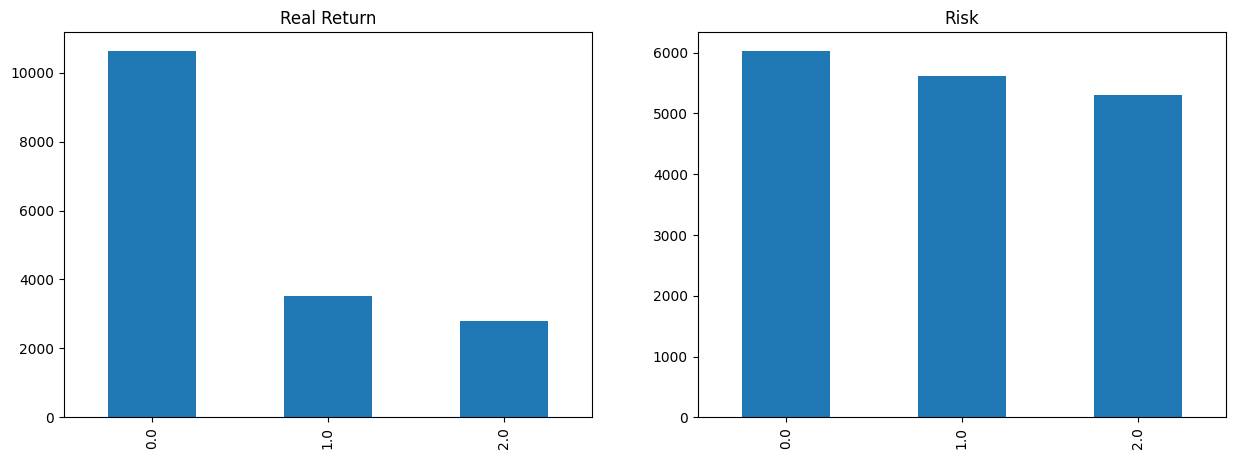

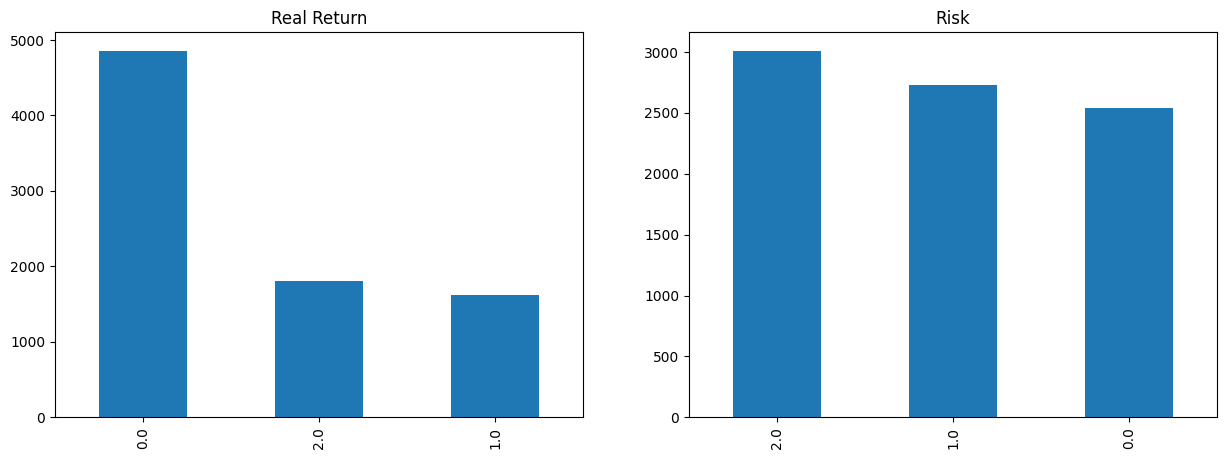

In [19]:
TRAINING_START_DATE =  dt.datetime.strptime('2009-03-31', "%Y-%m-%d")
TRAINING_END_DATE =  dt.datetime.strptime('2018-03-31', "%Y-%m-%d")

TEST_START_DATE =  dt.datetime.strptime('2018-06-30', "%Y-%m-%d")
TEST_END_DATE =  dt.datetime.strptime('2022-03-31', "%Y-%m-%d")

dataset_sort = dataset.sort_values(by=DATE)
count_train = 0
count_test = 0

for index, row in dataset_sort.iterrows():
  date = dt.datetime.strptime(row[DATE], "%Y-%m-%d")
  if date.year < TEST_START_DATE.year:
    df_train = df_train.append(row)
    count_train +=1
  elif date.year == TEST_START_DATE.year and date.month < TEST_START_DATE.month:
    df_train = df_train.append(row)
    count_train +=1
  else:
    df_test = df_test.append(row)
    count_test += 1

print(count_train)
print(count_test)

df_train = df_train.drop(columns=[REAL_RETURN, RISK, DATE])
df_test = df_test.drop(columns=[REAL_RETURN, RISK, DATE])

plotResults(df_train, "Real Return", "Risk")

plotResults(df_test, "Real Return", "Risk")

##### Real Return

In [20]:
X_real_return_train = df_train[features_real_return]
y_real_return_train = df_train[REAL_RETURN_CLASS]

X_real_return_test = df_test[features_real_return]
y_real_return_test = df_test[REAL_RETURN_CLASS]

##### Risk

In [21]:
X_risk_train = df_train[features_risk]
y_risk_train = df_train[RISK_CLASS]

X_risk_test = df_test[features_risk]
y_risk_test = df_test[RISK_CLASS]

### Classificadores Únicos

In [22]:
classifiers_real_return = {}
classifiers_risk = {}

#### Random Forest

##### Real Return

In [23]:
RANDOM_FOREST = 'RANDOM_FOREST'

randon_forest_return = RandomForestClassifier(n_estimators=300, max_depth=50, random_state=0)
classifiers_real_return[RANDOM_FOREST] = randon_forest_return

randon_forest_return.fit(X_real_return_train, y_real_return_train)

randon_forest_return.score(X_real_return_test, y_real_return_test)

0.8633510381458233

##### Risk

In [24]:
randon_forest_risk = RandomForestClassifier(n_estimators=300, max_depth=200, random_state=0)

classifiers_risk[RANDOM_FOREST] = randon_forest_risk
randon_forest_risk.fit(X_risk_train, y_risk_train)

print(randon_forest_risk.score(X_risk_test, y_risk_test))



0.501086431675519


#### SVM

##### Real Return

In [25]:
SVM = 'SVM'

svm_real_return = SVC(kernel='rbf', C=100)
classifiers_real_return[SVM] = svm_real_return

svm_real_return.fit(X_real_return_train, y_real_return_train)

svm_real_return.score(X_real_return_test, y_real_return_test)

0.6045388701110574

##### Risk

In [26]:
svm_risk = SVC(kernel='rbf', C=100)
classifiers_risk[SVM] = svm_risk

svm_risk.fit(X_risk_train, y_risk_train)

svm_risk.score(X_risk_test, y_risk_test)

0.418759053597296

#### Decision Tree

##### Real Return

In [27]:
DECISION_TREE = 'DECISION_TREE'

decision_tree_real_return = DecisionTreeClassifier(min_samples_split=2000)
classifiers_real_return[DECISION_TREE] = decision_tree_real_return

decision_tree_real_return.fit(X_real_return_train, y_real_return_train)

decision_tree_real_return.score(X_real_return_test, y_real_return_test)

0.8670931916948335

##### Risk

In [28]:
decision_tree_risk = DecisionTreeClassifier(min_samples_split=2000)
classifiers_risk[DECISION_TREE] = decision_tree_risk

decision_tree_risk.fit(X_risk_train, y_risk_train)

decision_tree_risk.score(X_risk_test, y_risk_test)

0.4697006277160792

#### Gaussian Naive Bayes

##### Real Return

In [29]:
NAIVE_BAYES = 'NAIVE_BAYES'

nb_real_return = BernoulliNB()
classifiers_real_return[NAIVE_BAYES] = nb_real_return

nb_real_return.fit(X_real_return_train, y_real_return_train)

nb_real_return.score(X_real_return_test, y_real_return_test)

0.447609850313858

##### Risk

In [30]:
nb_risk = BernoulliNB()
classifiers_risk[NAIVE_BAYES] = nb_risk

nb_risk.fit(X_risk_train, y_risk_train)

nb_risk.score(X_risk_test, y_risk_test)

0.4094640270400773

#### Rede Neural

Como determinar o número de camadas e neurônios?

##### Real Return

In [31]:
NEURAL_NETWORK = 'NEURAL_NETWORK'
neural_return = MLPClassifier(activation='logistic', solver='lbfgs', max_iter=300, hidden_layer_sizes=(100,))
classifiers_real_return[NEURAL_NETWORK] = neural_return

neural_return.fit(X_real_return_train, y_real_return_train)

neural_return.score(X_real_return_test, y_real_return_test)



0.6345968131337518

##### Risk

In [32]:
neural_risk = MLPClassifier(activation='logistic', solver='lbfgs', max_iter=300, hidden_layer_sizes=(100,))
classifiers_risk[NEURAL_NETWORK] = neural_risk

neural_risk.fit(X_risk_train, y_risk_train)

neural_risk.score(X_risk_test, y_risk_test)

0.41067117334620956

#### Regressão Logística

##### Real Return

In [33]:
LOGISTIC_REGRESSION ='LOGISTIC_REGRESSION'

rl_return = LogisticRegression(solver='newton-cg', penalty='l2')
classifiers_real_return[LOGISTIC_REGRESSION] = rl_return

rl_return.fit(X_real_return_train, y_real_return_train)

rl_return.score(X_real_return_test, y_real_return_test)

0.7880251086431675

##### Risk

In [34]:
rl_risk = LogisticRegression(solver='newton-cg', penalty='l2')
classifiers_risk[LOGISTIC_REGRESSION] = rl_risk

rl_risk.fit(X_risk_train, y_risk_train)

rl_risk.score(X_risk_test, y_risk_test)

0.43336552390149685

#### KNeighborsClassifier

##### Real Return

In [35]:
K_NEIGHBORS ='KNeighborsClassifier'

knn_return = KNeighborsClassifier(n_neighbors=100, weights='distance', leaf_size=100)
classifiers_real_return[K_NEIGHBORS] = knn_return

knn_return.fit(X_real_return_train, y_real_return_train)

knn_return.score(X_real_return_test, y_real_return_test)

0.6548768710767745

##### Risk

In [36]:
knn_risk = KNeighborsClassifier(n_neighbors=100, weights='distance', leaf_size=100)
classifiers_risk[K_NEIGHBORS] = knn_risk

knn_risk.fit(X_risk_train, y_risk_train)

knn_risk.score(X_risk_test, y_risk_test)

0.4246740704973443

#### XGboost

##### Real Return

In [37]:
XG_BOOST = 'XG_BOOST'

xg_boost = xgboost.XGBClassifier()
classifiers_real_return[XG_BOOST] = xg_boost

xg_boost.fit(X_real_return_train, y_real_return_train)

xg_boost.score(X_real_return_test, y_real_return_test)

0.8606953162723322

##### Risk

In [38]:
xg_boost = xgboost.XGBClassifier()
classifiers_risk[XG_BOOST] = xg_boost

xg_boost.fit(X_risk_train, y_risk_train)

xg_boost.score(X_risk_test, y_risk_test)

0.498430709802028

### Cross-validation

In [39]:
CV = 10
result_cv_real_return = {}
result_cv_risk = {}

X_dataset_real_return = dataset[features_real_return]
y_dataset_real_return = dataset[REAL_RETURN_CLASS]

X_dataset_risk = dataset[features_risk]
y_dataset_risk = dataset[RISK_CLASS]

##### Real Return

In [40]:
cv_result = cross_val_score(classifiers_real_return[RANDOM_FOREST], X_dataset_real_return, y_dataset_real_return, cv=CV, n_jobs=-1)
result_cv_real_return[RANDOM_FOREST] = cv_result.mean()

cv_result = cross_val_score(classifiers_real_return[SVM], X_dataset_real_return, y_dataset_real_return, cv=CV, n_jobs=-1)
result_cv_real_return[SVM] = cv_result.mean()

cv_result = cross_val_score(classifiers_real_return[DECISION_TREE], X_dataset_real_return, y_dataset_real_return, cv=CV, n_jobs=-1)
result_cv_real_return[DECISION_TREE] = cv_result.mean()

cv_result = cross_val_score(classifiers_real_return[NAIVE_BAYES], X_dataset_real_return, y_dataset_real_return, cv=CV, n_jobs=-1)
result_cv_real_return[NAIVE_BAYES] = cv_result.mean()

cv_result = cross_val_score(classifiers_real_return[NEURAL_NETWORK], X_dataset_real_return, y_dataset_real_return, cv=CV, n_jobs=-1)
result_cv_real_return[NEURAL_NETWORK] = cv_result.mean()

cv_result = cross_val_score(classifiers_real_return[LOGISTIC_REGRESSION], X_dataset_real_return, y_dataset_real_return, cv=CV, n_jobs=-1)
result_cv_real_return[LOGISTIC_REGRESSION] = cv_result.mean()

cv_result = cross_val_score(classifiers_real_return[K_NEIGHBORS], X_dataset_real_return, y_dataset_real_return, cv=CV, n_jobs=-1)
result_cv_real_return[K_NEIGHBORS] = cv_result.mean()

cv_result = cross_val_score(classifiers_real_return[XG_BOOST], X_dataset_real_return, y_dataset_real_return, cv=CV, n_jobs=-1)
result_cv_real_return[XG_BOOST] = cv_result.mean()

result_cv_real_return

{'RANDOM_FOREST': 0.8328594090787842,
 'SVM': 0.6031773548194757,
 'DECISION_TREE': 0.8744844424220553,
 'NAIVE_BAYES': 0.47017983398973806,
 'NEURAL_NETWORK': 0.6585076964114795,
 'LOGISTIC_REGRESSION': 0.7851704351100721,
 'KNeighborsClassifier': 0.6193378575575466,
 'XG_BOOST': 0.8226414146961447}

##### Risk

In [41]:
cv_result = cross_val_score(classifiers_risk[RANDOM_FOREST], X_dataset_risk, y_dataset_risk, cv=CV, n_jobs=-1)
result_cv_risk[RANDOM_FOREST] = cv_result.mean()

cv_result = cross_val_score(classifiers_risk[SVM], X_dataset_risk, y_dataset_risk, cv=CV, n_jobs=-1)
result_cv_risk[SVM] = cv_result.mean()

cv_result = cross_val_score(classifiers_risk[DECISION_TREE], X_dataset_risk, y_dataset_risk, cv=CV, n_jobs=-1)
result_cv_risk[DECISION_TREE] = cv_result.mean()

cv_result = cross_val_score(classifiers_risk[NAIVE_BAYES], X_dataset_risk, y_dataset_risk, cv=CV, n_jobs=-1)
result_cv_risk[NAIVE_BAYES] = cv_result.mean()

cv_result = cross_val_score(classifiers_risk[NEURAL_NETWORK], X_dataset_risk, y_dataset_risk, cv=CV, n_jobs=-1)
result_cv_risk[NEURAL_NETWORK] = cv_result.mean()

cv_result = cross_val_score(classifiers_risk[LOGISTIC_REGRESSION], X_dataset_risk, y_dataset_risk, cv=CV, n_jobs=-1)
result_cv_risk[LOGISTIC_REGRESSION] = cv_result.mean()

cv_result = cross_val_score(classifiers_risk[K_NEIGHBORS], X_dataset_risk, y_dataset_risk, cv=CV, n_jobs=-1)
result_cv_risk[K_NEIGHBORS] = cv_result.mean()

cv_result = cross_val_score(classifiers_risk[XG_BOOST], X_dataset_risk, y_dataset_risk, cv=CV, n_jobs=-1)
result_cv_risk[XG_BOOST] = cv_result.mean()

result_cv_risk

{'RANDOM_FOREST': 0.44312307981986787,
 'SVM': 0.3952745916429995,
 'DECISION_TREE': 0.4695011532849006,
 'NAIVE_BAYES': 0.4189644443049693,
 'NEURAL_NETWORK': 0.4310021025874378,
 'LOGISTIC_REGRESSION': 0.39068210133216175,
 'KNeighborsClassifier': 0.40232725047465134,
 'XG_BOOST': 0.4568670034990821}

### Selection Of Cassifier

#### List of Sets

In [42]:
classifiers = list(result_cv_real_return.keys())
list_sets = []

for i in range(len(classifiers)):
  for j in range(i + 1, len(classifiers)):
    list_sets.append((classifiers[i], classifiers[j]))

list_sets


[('RANDOM_FOREST', 'SVM'),
 ('RANDOM_FOREST', 'DECISION_TREE'),
 ('RANDOM_FOREST', 'NAIVE_BAYES'),
 ('RANDOM_FOREST', 'NEURAL_NETWORK'),
 ('RANDOM_FOREST', 'LOGISTIC_REGRESSION'),
 ('RANDOM_FOREST', 'KNeighborsClassifier'),
 ('RANDOM_FOREST', 'XG_BOOST'),
 ('SVM', 'DECISION_TREE'),
 ('SVM', 'NAIVE_BAYES'),
 ('SVM', 'NEURAL_NETWORK'),
 ('SVM', 'LOGISTIC_REGRESSION'),
 ('SVM', 'KNeighborsClassifier'),
 ('SVM', 'XG_BOOST'),
 ('DECISION_TREE', 'NAIVE_BAYES'),
 ('DECISION_TREE', 'NEURAL_NETWORK'),
 ('DECISION_TREE', 'LOGISTIC_REGRESSION'),
 ('DECISION_TREE', 'KNeighborsClassifier'),
 ('DECISION_TREE', 'XG_BOOST'),
 ('NAIVE_BAYES', 'NEURAL_NETWORK'),
 ('NAIVE_BAYES', 'LOGISTIC_REGRESSION'),
 ('NAIVE_BAYES', 'KNeighborsClassifier'),
 ('NAIVE_BAYES', 'XG_BOOST'),
 ('NEURAL_NETWORK', 'LOGISTIC_REGRESSION'),
 ('NEURAL_NETWORK', 'KNeighborsClassifier'),
 ('NEURAL_NETWORK', 'XG_BOOST'),
 ('LOGISTIC_REGRESSION', 'KNeighborsClassifier'),
 ('LOGISTIC_REGRESSION', 'XG_BOOST'),
 ('KNeighborsClassifier'

#### Real Return Classifiers

In [43]:
real_return_classifiers = []

for classifier_set in list_sets:  
  set_0 = result_cv_real_return[classifier_set[0]]
  set_1 = result_cv_real_return[classifier_set[1]]

  avg = (set_0 + set_1) / 2
  if avg >= 0.75:
    if classifier_set[0] not in real_return_classifiers:
      real_return_classifiers.append(classifier_set[0])

    if classifier_set[1] not in real_return_classifiers:
      real_return_classifiers.append(classifier_set[1])

real_return_classifiers


['RANDOM_FOREST',
 'DECISION_TREE',
 'LOGISTIC_REGRESSION',
 'XG_BOOST',
 'NEURAL_NETWORK']

#### Risk Classifiers

In [44]:
risk_classifiers = []

for classifier_set in list_sets:  
  set_0 = result_cv_risk[classifier_set[0]]
  set_1 = result_cv_risk[classifier_set[1]]

  avg = (set_0 + set_1) / 2
  if avg >= 0.45:
    if classifier_set[0] not in risk_classifiers:
      risk_classifiers.append(classifier_set[0])

    if classifier_set[1] not in risk_classifiers:
      risk_classifiers.append(classifier_set[1])

risk_classifiers

['RANDOM_FOREST', 'DECISION_TREE', 'NEURAL_NETWORK', 'XG_BOOST']

### Fusion of Classifiers

#### Training with diversification

##### Whitout diversity

Real Return

In [45]:
real_return_whitout_diversity = {}

for classifier in real_return_classifiers:
  real_return_whitout_diversity[classifier] = classifiers_real_return[classifier]
  real_return_whitout_diversity[classifier].fit(X_real_return_train, y_real_return_train)

  print(classifier, real_return_whitout_diversity[classifier].score(X_real_return_test, y_real_return_test))

RANDOM_FOREST 0.8633510381458233
DECISION_TREE 0.8670931916948335
LOGISTIC_REGRESSION 0.7880251086431675
XG_BOOST 0.8606953162723322
NEURAL_NETWORK 0.6419604056011589


Risk

In [46]:
risk_whitout_diversity = {}

for classifier in risk_classifiers:
  risk_whitout_diversity[classifier] = classifiers_risk[classifier]
  risk_whitout_diversity[classifier].fit(X_risk_train, y_risk_train)

  print(classifier, risk_whitout_diversity[classifier].score(X_risk_test, y_risk_test))

RANDOM_FOREST 0.501086431675519
DECISION_TREE 0.4697006277160792
NEURAL_NETWORK 0.4267262192177692
XG_BOOST 0.498430709802028


##### Bagging

Real Return

In [47]:
real_return_bagging = {}

for classifier in real_return_classifiers:
  estimator = classifiers_real_return[classifier]
  real_return_bagging[classifier] = BaggingClassifier(estimator=estimator, n_jobs=-1)
  real_return_bagging[classifier].fit(X_real_return_train, y_real_return_train)

  print(classifier, real_return_bagging[classifier].score(X_real_return_test, y_real_return_test))

RANDOM_FOREST 0.8663689039111541
DECISION_TREE 0.8670931916948335
LOGISTIC_REGRESSION 0.7830758087880251
XG_BOOST 0.8652824722356349
NEURAL_NETWORK 0.6402704007725737


Risk

In [48]:
risk_bagging = {}

for classifier in risk_classifiers:
  estimator = classifiers_risk[classifier]
  risk_bagging[classifier] = BaggingClassifier(estimator=estimator, n_jobs=-1)
  risk_bagging[classifier].fit(X_risk_train, y_risk_train)

  print(classifier, risk_bagging[classifier].score(X_risk_test, y_risk_test))

RANDOM_FOREST 0.5100193143408981
DECISION_TREE 0.4684934814099469
NEURAL_NETWORK 0.4288990825688073
XG_BOOST 0.5086914534041526


##### AdaBoost

Real Return

In [49]:
real_return_adaboost = {}

for classifier in real_return_classifiers:
  estimator = classifiers_real_return[classifier]
  try:
    real_return_adaboost[classifier] = AdaBoostClassifier(estimator=estimator)
    real_return_adaboost[classifier].fit(X_real_return_train, y_real_return_train)
    print(classifier, real_return_adaboost[classifier].score(X_real_return_test, y_real_return_test))
  except:
    real_return_adaboost.pop(classifier)
    print(classifier, "Não utilizado")


RANDOM_FOREST 0.8646788990825688
DECISION_TREE 0.8302752293577982
LOGISTIC_REGRESSION 0.6898841139546112
XG_BOOST 0.5866731047802993
NEURAL_NETWORK Não utilizado


Risk

In [50]:
risk_adaboost = {}

for classifier in risk_classifiers:
  estimator = classifiers_risk[classifier]
  try:
    risk_adaboost[classifier] = AdaBoostClassifier(estimator=estimator)
    risk_adaboost[classifier].fit(X_risk_train, y_risk_train)
    print(classifier, risk_adaboost[classifier].score(X_risk_test, y_risk_test))
  except:
    risk_adaboost.pop(classifier)
    print(classifier, "Não utilizado")

RANDOM_FOREST 0.5048285852245292
DECISION_TREE 0.4620956059874457
NEURAL_NETWORK Não utilizado
XG_BOOST 0.306615161757605


#### Fusion

In [51]:
def fusion(fusion_model, models, X_data, y_data):
  df_fusion = pd.DataFrame()

  for model in models:
    X_predict = models[model].predict(X_data)
  
    df_fusion[model] = X_predict

  X_train, X_test, y_train, y_test = train_test_split(df_fusion, y_data, test_size=0.3, random_state=42)

  print(X_train)
  fusion_model.fit(X_train, y_train)
  
  return fusion_model.score(X_test, y_test)

##### Whitout diversity

Real Return

In [52]:
model = KNeighborsClassifier(n_neighbors=1000, leaf_size=30, p=2)

fusion(model, real_return_whitout_diversity, X_dataset_real_return, y_dataset_real_return)

       RANDOM_FOREST  DECISION_TREE  LOGISTIC_REGRESSION  XG_BOOST  \
16726            0.0            0.0                  0.0         0   
20682            0.0            0.0                  0.0         0   
12217            1.0            0.0                  0.0         1   
22872            0.0            0.0                  0.0         0   
13206            1.0            1.0                  1.0         1   
...              ...            ...                  ...       ...   
21575            2.0            2.0                  2.0         2   
5390             1.0            0.0                  0.0         0   
860              0.0            0.0                  0.0         0   
15795            0.0            0.0                  0.0         0   
23654            1.0            1.0                  1.0         1   

       NEURAL_NETWORK  
16726             0.0  
20682             0.0  
12217             0.0  
22872             0.0  
13206             0.0  
...            

0.9325412541254126

Risk

In [53]:
fusion(model, risk_whitout_diversity, X_dataset_risk, y_dataset_risk)

       RANDOM_FOREST  DECISION_TREE  NEURAL_NETWORK  XG_BOOST
16726            1.0            1.0             1.0         1
20682            0.0            0.0             0.0         1
12217            1.0            1.0             2.0         1
22872            0.0            0.0             1.0         0
13206            0.0            0.0             0.0         0
...              ...            ...             ...       ...
21575            2.0            2.0             2.0         2
5390             2.0            1.0             0.0         0
860              0.0            0.0             2.0         2
15795            0.0            0.0             0.0         0
23654            2.0            0.0             2.0         2

[17673 rows x 4 columns]


0.78996699669967

##### Bagging

Real Return

In [54]:
model = KNeighborsClassifier(n_neighbors=1000, leaf_size=30, p=2)

fusion(model, real_return_bagging, X_dataset_real_return, y_dataset_real_return)

       RANDOM_FOREST  DECISION_TREE  LOGISTIC_REGRESSION  XG_BOOST  \
16726            0.0            0.0                  0.0       0.0   
20682            0.0            0.0                  0.0       0.0   
12217            1.0            0.0                  0.0       1.0   
22872            0.0            0.0                  0.0       0.0   
13206            1.0            1.0                  1.0       1.0   
...              ...            ...                  ...       ...   
21575            2.0            2.0                  2.0       2.0   
5390             0.0            0.0                  0.0       0.0   
860              0.0            0.0                  0.0       0.0   
15795            0.0            0.0                  0.0       0.0   
23654            1.0            1.0                  1.0       1.0   

       NEURAL_NETWORK  
16726             0.0  
20682             0.0  
12217             0.0  
22872             0.0  
13206             0.0  
...            

0.9168316831683169

Risk

In [55]:
fusion(model, risk_bagging, X_dataset_risk, y_dataset_risk)

       RANDOM_FOREST  DECISION_TREE  NEURAL_NETWORK  XG_BOOST
16726            1.0            1.0             0.0       1.0
20682            0.0            0.0             0.0       0.0
12217            1.0            1.0             1.0       1.0
22872            0.0            0.0             1.0       0.0
13206            0.0            0.0             0.0       0.0
...              ...            ...             ...       ...
21575            2.0            2.0             1.0       2.0
5390             2.0            1.0             1.0       0.0
860              0.0            0.0             0.0       0.0
15795            0.0            0.0             0.0       0.0
23654            2.0            0.0             2.0       2.0

[17673 rows x 4 columns]


0.7755775577557755

##### AdaBoost

Real Return

In [56]:
model = KNeighborsClassifier(n_neighbors=1000, leaf_size=30, p=2)

fusion(model, real_return_adaboost, X_dataset_real_return, y_dataset_real_return)

       RANDOM_FOREST  DECISION_TREE  LOGISTIC_REGRESSION  XG_BOOST
16726            0.0            0.0                  0.0       0.0
20682            0.0            0.0                  0.0       0.0
12217            1.0            0.0                  0.0       0.0
22872            0.0            0.0                  0.0       0.0
13206            1.0            1.0                  1.0       0.0
...              ...            ...                  ...       ...
21575            2.0            2.0                  1.0       0.0
5390             1.0            0.0                  0.0       0.0
860              0.0            0.0                  0.0       0.0
15795            0.0            0.0                  0.0       0.0
23654            1.0            2.0                  1.0       0.0

[17673 rows x 4 columns]


0.9192079207920792

Risk

In [57]:
fusion(model, risk_adaboost, X_dataset_risk, y_dataset_risk)

       RANDOM_FOREST  DECISION_TREE  XG_BOOST
16726            1.0            1.0       0.0
20682            0.0            0.0       0.0
12217            1.0            1.0       0.0
22872            0.0            1.0       0.0
13206            0.0            0.0       0.0
...              ...            ...       ...
21575            2.0            2.0       0.0
5390             2.0            1.0       0.0
860              0.0            2.0       0.0
15795            0.0            0.0       0.0
23654            2.0            2.0       0.0

[17673 rows x 3 columns]


0.8277227722772277